# Telecom Churn Case Study

The analysis is divided into nine main parts:

<br>Data Reading or Data Understanding 
<br>Data cleaning and Derived Metrics <n>
<br>Exploratory Data Analysis (Univariate, Bivariate Analysis) <n>
<br>Model Preparation <n>
<br>Train and Test Data Split <n>
<br>Data Normalization <n>
<br>Handling Class Imbalance <n>
<br>Model Building <n>
<br>Residual Analysis of the Train Data <n>
<br>Making Predictions <n>
<br>Model Evaluation <n>
<br>Final Inference <n>

In [2]:
# Importing the basic libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, log_loss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Reading and Understanding Data


In [3]:
#Reading train and test dataset
telecom_train = pd.read_csv("train (1).csv")
unseen = pd.read_csv("test (1).csv")

In [4]:
# Head of our train data
telecom_train.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [5]:
telecom_train.shape

(69999, 172)

In [6]:
telecom_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

###### As we can see that the columns with datetime values are represented as object, will convert it into datetime format


In [7]:
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'
            ]

In [8]:

# Converting the selected columns to datetime format
for i in date_cols:
    telecom_train[i] = pd.to_datetime(telecom_train[i])

In [9]:
telecom_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    id                        int64         
 1    circle_id                 int64         
 2    loc_og_t2o_mou            float64       
 3    std_og_t2o_mou            float64       
 4    loc_ic_t2o_mou            float64       
 5    last_date_of_month_6      datetime64[ns]
 6    last_date_of_month_7      datetime64[ns]
 7    last_date_of_month_8      datetime64[ns]
 8    arpu_6                    float64       
 9    arpu_7                    float64       
 10   arpu_8                    float64       
 11   onnet_mou_6               float64       
 12   onnet_mou_7               float64       
 13   onnet_mou_8               float64       
 14   offnet_mou_6              float64       
 15   offnet_mou_7              float64       
 16   offnet_mou_8              float64     

All Date time columns are now converted into DateTime format

### Data Cleaning 

###### Checking for unique values. It any column contains unique values we will drop the column as it won't help us with any inferences

In [10]:
# lets check the columns unique values and drop such columns
unique_1_col=[]
for i in telecom_train.columns:
    if telecom_train[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

In [11]:

telecom_train.drop(unique_1_col, axis=1, inplace = True)
print("Columns dropped :\n",unique_1_col)

Columns dropped :
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [12]:
#dropping column 'id'
telecom_train.drop('id',axis=1, inplace=True)

In [13]:
telecom_train.shape

(69999, 158)

###### Checking for missing Values 


In [14]:
#Checking for missing value percentage
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>0]

,Percentage
onnet_mou_6,3.954342
onnet_mou_7,3.838626
onnet_mou_8,5.290076
offnet_mou_6,3.954342
offnet_mou_7,3.838626
offnet_mou_8,5.290076
roam_ic_mou_6,3.954342
roam_ic_mou_7,3.838626
roam_ic_mou_8,5.290076
roam_og_mou_6,3.954342


Most of the missing values in df are greater than 70%

In [15]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>70]

,Percentage
date_of_last_rech_data_6,74.902499
date_of_last_rech_data_7,74.478207
date_of_last_rech_data_8,73.689624
total_rech_data_6,74.902499
total_rech_data_7,74.478207
total_rech_data_8,73.689624
max_rech_data_6,74.902499
max_rech_data_7,74.478207
max_rech_data_8,73.689624
count_rech_2g_6,74.902499


Below mentioned columns gives meaningfull insites and hence instead of deleting we need to handle the missing values.
<br>total_rech_data_6 - 74.8467 % missing values
<br>total_rech_data_7 - 74.4287 % missing values
<br>total_rech_data_8 - 73.6896 % missing values
<br>av_rech_amt_data_6 - 74.8467 % missing values
<br>av_rech_amt_data_7 - 74.4287 % missing values
<br>av_rech_amt_data_8 - 73.6896 % missing values
<br>date_of_last_rech_data_6 - 74.8467 % missing values
<br>date_of_last_rech_data_7 - 74.4287 % missing values
<br>date_of_last_rech_data_8 - 73.6896 % missing values

Here if the columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both have null values at the same index, then it would mean there was no data recharge done for that month and we can safely impute the 'total_rech_data_6' value with 0.
simirarly as both columns will be null average recharge amount and max recharge amout will also be imputed as 0

In [16]:
total_rech_data_6_index = telecom_train['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_train['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [17]:
telecom_train['total_rech_data_6'].fillna(0, inplace=True)
telecom_train['av_rech_amt_data_6'].fillna(0, inplace=True)
telecom_train['max_rech_data_6'].fillna(0, inplace=True)


We will apply above same logic for month 7 and 8

In [18]:
total_rech_data_7_index = telecom_train['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_train['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [19]:
total_rech_data_8_index = telecom_train['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_train['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [20]:
telecom_train['total_rech_data_7'].fillna(0, inplace=True)
telecom_train['av_rech_amt_data_7'].fillna(0, inplace=True)
telecom_train['max_rech_data_7'].fillna(0, inplace=True)
telecom_train['total_rech_data_8'].fillna(0, inplace=True)
telecom_train['av_rech_amt_data_8'].fillna(0, inplace=True)
telecom_train['max_rech_data_8'].fillna(0, inplace=True)

In [21]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>70]

,Percentage
date_of_last_rech_data_6,74.902499
date_of_last_rech_data_7,74.478207
date_of_last_rech_data_8,73.689624
count_rech_2g_6,74.902499
count_rech_2g_7,74.478207
count_rech_2g_8,73.689624
count_rech_3g_6,74.902499
count_rech_3g_7,74.478207
count_rech_3g_8,73.689624
arpu_3g_6,74.902499


In [22]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>70]

,Percentage
date_of_last_rech_data_6,74.902499
date_of_last_rech_data_7,74.478207
date_of_last_rech_data_8,73.689624
count_rech_2g_6,74.902499
count_rech_2g_7,74.478207
count_rech_2g_8,73.689624
count_rech_3g_6,74.902499
count_rech_3g_7,74.478207
count_rech_3g_8,73.689624
arpu_3g_6,74.902499


#### Observation

The missing values in recharge columns are not actully missing, rather it means the customers have not recharged.

Hence these should be imputed with 0 signifying no recharge.

In [23]:
rechCols = [ 'date_of_last_rech_data_6', 'date_of_last_rech_data_7' ,'date_of_last_rech_data_8','count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8']
rechCols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'count_rech_2g_8',
 'count_rech_3g_8']

In [24]:
telecom_train[rechCols] = telecom_train[rechCols].apply(lambda x: x.fillna(0))

In [25]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>70]

,Percentage
arpu_3g_6,74.902499
arpu_3g_7,74.478207
arpu_3g_8,73.689624
arpu_2g_6,74.902499
arpu_2g_7,74.478207
arpu_2g_8,73.689624
night_pck_user_6,74.902499
night_pck_user_7,74.478207
night_pck_user_8,73.689624
fb_user_6,74.902499


#### Category columns missing values will be imputed with -1 as new category.

In [26]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'
            ]

In [27]:
telecom_train[cat_cols] = telecom_train[cat_cols].apply(lambda x: x.fillna(-1))

In [28]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>70]

,Percentage
arpu_3g_6,74.902499
arpu_3g_7,74.478207
arpu_3g_8,73.689624
arpu_2g_6,74.902499
arpu_2g_7,74.478207
arpu_2g_8,73.689624


Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7 and 8


In [29]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8
print("Correlation table for month 6\n\n", telecom_train[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", telecom_train[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", telecom_train[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())


Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.930150            0.805494
arpu_2g_6            0.930150   1.000000            0.833773
av_rech_amt_data_6   0.805494   0.833773            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000    0.93443            0.799627
arpu_2g_7            0.934430    1.00000            0.815300
av_rech_amt_data_7   0.799627    0.81530            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.923875            0.786412
arpu_2g_8            0.923875   1.000000            0.800717
av_rech_amt_data_8   0.786412   0.800717            1.000000


Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.

In [30]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
telecom_train.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8'],axis=1, inplace=True)


Majority of the null values are in Minutes of usage - voice calls
Rest of the Null values belong to incoming and outgoing calls As these values are not available that means in these cases the customer has not used the telecom service at all for that particular call type, thus we can fill the missing values with 0 instead of removing and iteratively imputing.

In [31]:
mou_og_cols= ['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [32]:
#Let's drop the higly correlated outgoing minutes of usage columns
telecom_train.drop(mou_og_cols,1,inplace=True)

In [33]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>0]

,Percentage
onnet_mou_6,3.954342
onnet_mou_7,3.838626
onnet_mou_8,5.290076
offnet_mou_6,3.954342
offnet_mou_7,3.838626
offnet_mou_8,5.290076
roam_ic_mou_6,3.954342
roam_ic_mou_7,3.838626
roam_ic_mou_8,5.290076
roam_og_mou_6,3.954342


In [34]:
#Get a list of all 84 columns which is having NaN values and requires imputation with 0.
col_NaN = telecom_train.loc[:, telecom_train.isnull().any()].columns
col_NaN.shape

(78,)

In [35]:
# replacing null values by 0 for all above 84 columns
# Imputing the
# NaN values using KNN Imputer

for col in col_NaN:
    telecom_train[col] = telecom_train[col].fillna(0)

In [36]:
#Checking for missing value percentage greater than 70%
df_1= pd.DataFrame(telecom_train.isnull().mean()*100,columns=['Percentage'])
df_1[df_1['Percentage']>0]


,Percentage


In [37]:
#Let's verify NaN on statistical level
telecom_train.isnull().sum()

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8            0
std_og_t2m_mou_6            0
std_og_t2m_mou_7            0
std_og_t2m_mou_8            0
std_og_t2f

In [38]:
telecom_train.shape

(69999, 143)

#### Filtering the Data

In [39]:
 # Calculating the total recharge amount done for data alone in months 6,7 and 8

telecom_train['total_data_rech_amt_6'] = telecom_train['total_rech_data_6'] * telecom_train['av_rech_amt_data_6']
telecom_train['total_data_rech_amt_7'] = telecom_train['total_rech_data_7'] * telecom_train['av_rech_amt_data_7']
telecom_train['total_data_rech_amt_8'] = telecom_train['total_rech_data_8'] * telecom_train['av_rech_amt_data_8']

# Calculating the overall recharge amount for the months 6,7
telecom_train['overall_rech_amt_6'] = telecom_train['total_data_rech_amt_6'] + telecom_train['total_rech_amt_6']
telecom_train['overall_rech_amt_7'] = telecom_train['total_data_rech_amt_7'] + telecom_train['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
telecom_train['avg_rech_amt_6_7'] = (telecom_train['overall_rech_amt_6'] + telecom_train['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = telecom_train['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off)

# Filtering the data to the top 30% considered as High Value Customer
telecom_train = telecom_train[telecom_train['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  477.5


In [40]:
# The curent dimension of the dataset
telecom_train.shape

(21013, 149)

In [41]:
# check the data
telecom_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,2014-06-25 00:00:00,2014-07-26 00:00:00,2014-08-30 00:00:00,25,10,30,2014-06-25 00:00:00,2014-07-23 00:00:00,2014-08-20 00:00:00,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,1494.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,2014-06-27 00:00:00,2014-07-25 00:00:00,2014-08-30 00:00:00,0,150,250,2014-06-16 00:00:00,0,2014-08-02 00:00:00,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.0,0.00,0.00,0,154.0,0.0,154.0,808.0,400.0,604.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,0.0,0.0,0.0,

In [43]:
#Deleting Derived columns as they are no longer needed.
derived_column_list = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_data_rech_amt_6','total_data_rech_amt_7', 'total_data_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','overall_rech_amt_6','overall_rech_amt_7','avg_rech_amt_6_7']
telecom_train.drop(derived_column_list,axis=1, inplace=True)

In [44]:
# Reset the dataframe indexes

telecom_train = telecom_train.reset_index(drop=True)
telecom_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,2014-06-25 00:00:00,2014-07-26 00:00:00,2014-08-30 00:00:00,25,10,30,2014-06-25 00:00:00,2014-07-23 00:00:00,2014-08-20 00:00:00,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0
1,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,2014-06-27 00:00:00,2014-07-25 00:00:00,2014-08-30 00:00:00,0,150,250,2014-06-16 00:00:00,0,2014-08-02 00:00:00,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.0,-1.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,-1.0,1.0,602,0.0,0.00,0.00,0
2,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-22 00:00:00,110,5

In [45]:
telecom_train.shape

(21013, 137)

Dervied new difference features for each of the features - The difference between 8th month and the average of 6th and 7th month.

In [46]:
#Derived tenure column
telecom_train['tenure'] = (telecom_train['aon']/30).round(0)

#Drop original column
telecom_train.drop('aon',axis=1, inplace=True)

In [47]:
#dropping Date columns
dtaeCols = list(filter(lambda x : 'date' in x, telecom_train.columns))
dtaeCols

telecom_train.drop(dtaeCols,axis=1, inplace=True)

In [48]:
telecom_train.shape

(21013, 131)

In [49]:
num_cols = [column for column in telecom_train.columns if column not in  id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#Numeric cols:%d\n#Category cols:%d" % (len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(num_cols) + len(cat_cols) == telecom_train.shape[1])

#Numeric cols:125
#Category cols:6
True


In [50]:
catColList = []
for col in telecom_train.columns:
    if telecom_train[col].dtypes == 'object':
        catColList.append(col)
print(catColList)

[]


## Visualization - Univariate & Bivariate Analysis

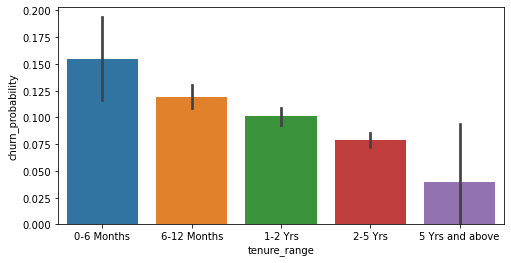

In [51]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_train['tenure_range'] = pd.cut(telecom_train['tenure'], tn_range, labels=tn_label)

plt.figure(figsize=[8,4])
sns.barplot(x='tenure_range',y='churn_probability', data=telecom_train)
plt.show()

#### Observation

There is high probability of churn during initial 6 months

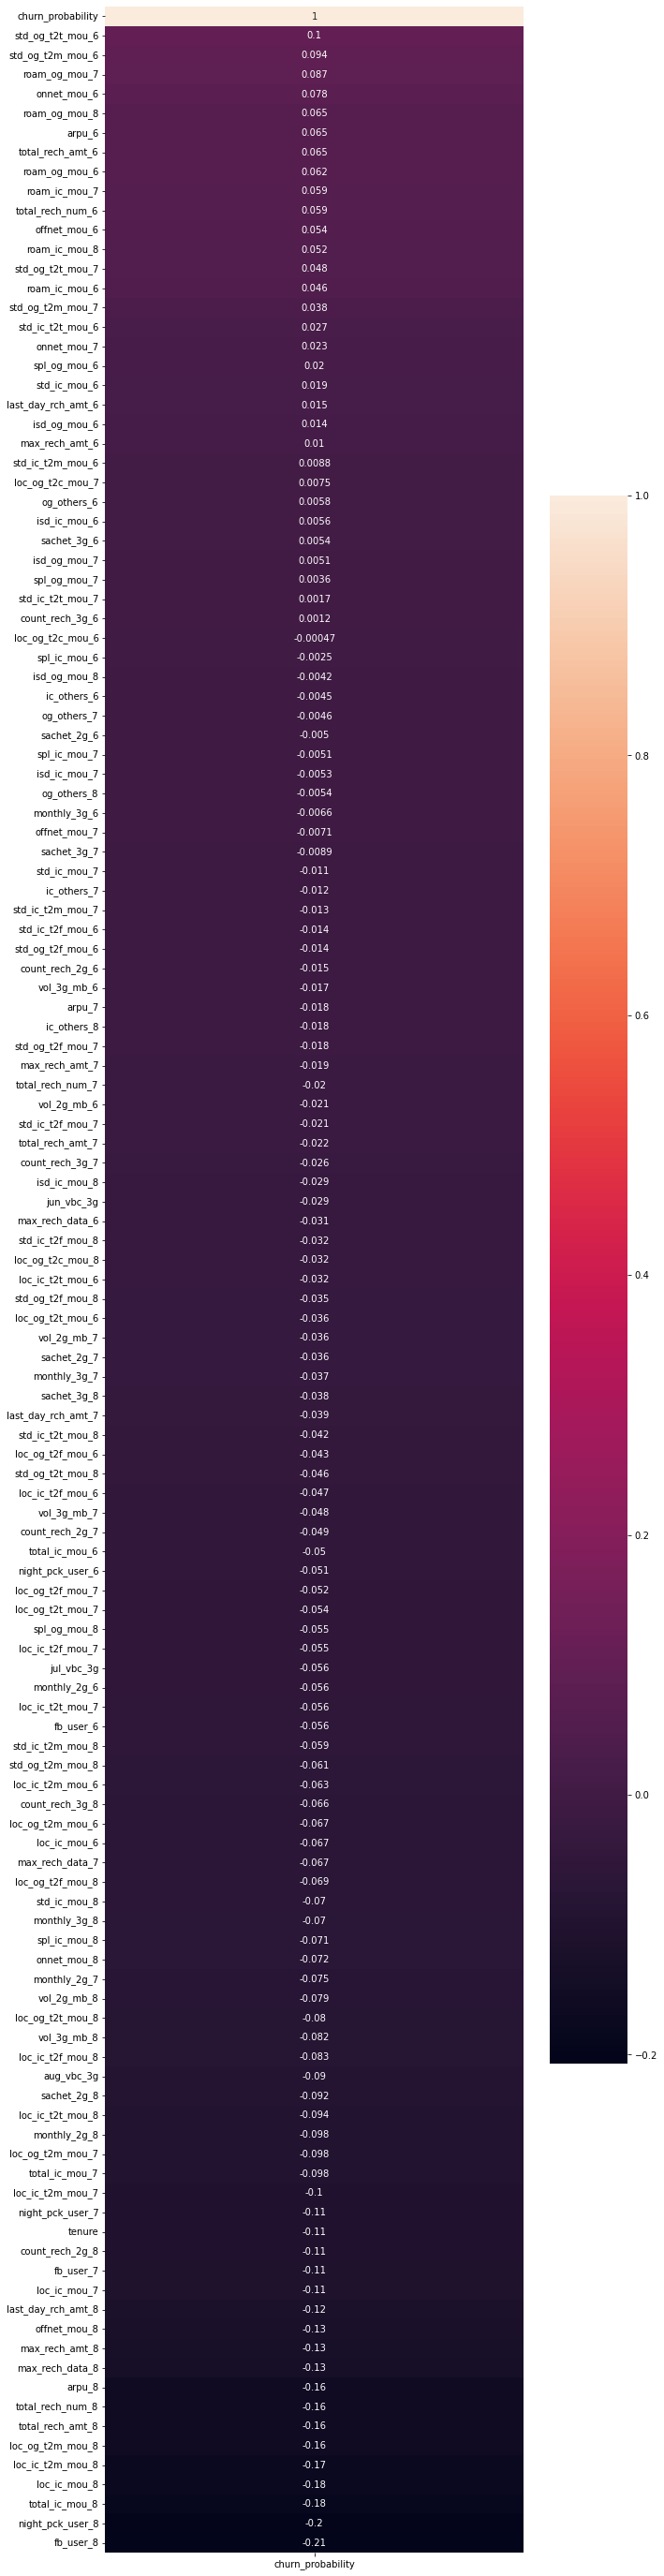

In [52]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_train.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True)

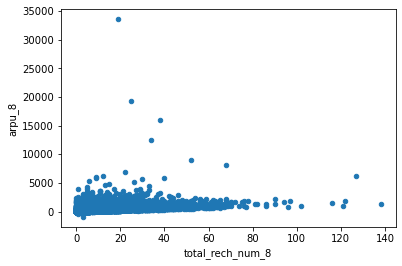

In [53]:
telecom_train[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

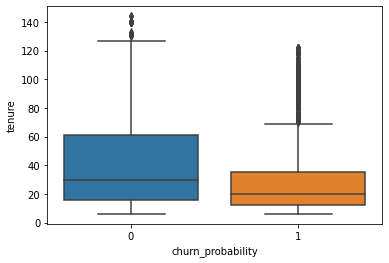

In [54]:
sns.boxplot(x = telecom_train.churn_probability, y = telecom_train.tenure)
plt.show()

#### Observation

Tenured customers do no churn and they keep availing telecom services

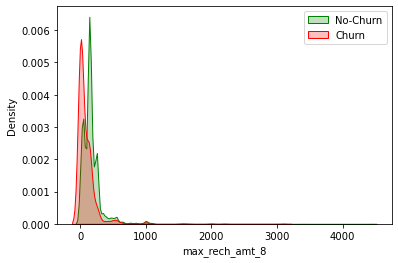

In [55]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(telecom_train.max_rech_amt_8[(telecom_train["churn_probability"] == 0)],
                color="green", shade = True)
ax = sns.kdeplot(telecom_train.max_rech_amt_8[(telecom_train["churn_probability"] == 1)],
                ax =ax, color="red", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')

plt.show()

#### Observation
No churn customers usually recharge more compared to churn customers

In [56]:
#As we already have column tenure range
telecom_train.drop('tenure_range',axis=1, inplace=True)
telecom_train.drop('tenure',axis=1, inplace=True)


In [57]:
num_cols.remove('churn_probability')
num_cols.remove('tenure') #As we are dropping this off

## Outlier Treatment for the Numerical Columns

In [58]:
def outlier_treatment(telecom_train,colName):
    IQR = telecom_train[colName].quantile(0.75)-telecom_train[colName].quantile(0.25)
    UF = telecom_train[colName].quantile(0.75) + (1.5*IQR)
    LF = telecom_train[colName].quantile(0.25) - (1.5*IQR)
    telecom_train.loc[telecom_train[colName] > UF,colName]=UF
    telecom_train.loc[telecom_train[colName] < LF,colName]=LF

In [59]:
count = 0
for col in num_cols:
    if telecom_train[col].value_counts().max() > 30 :
        print("Outlier Treatment done : " + col)
        count = count+1
        outlier_treatment(telecom_train,col)
print("Total Columns treated for Outliers : {}".format(count))

Outlier Treatment done : arpu_6
Outlier Treatment done : arpu_7
Outlier Treatment done : arpu_8
Outlier Treatment done : onnet_mou_6
Outlier Treatment done : onnet_mou_7
Outlier Treatment done : onnet_mou_8
Outlier Treatment done : offnet_mou_6
Outlier Treatment done : offnet_mou_7
Outlier Treatment done : offnet_mou_8
Outlier Treatment done : roam_ic_mou_6
Outlier Treatment done : roam_ic_mou_7
Outlier Treatment done : roam_ic_mou_8
Outlier Treatment done : roam_og_mou_6
Outlier Treatment done : roam_og_mou_7
Outlier Treatment done : roam_og_mou_8
Outlier Treatment done : loc_og_t2t_mou_6
Outlier Treatment done : loc_og_t2t_mou_7
Outlier Treatment done : loc_og_t2t_mou_8
Outlier Treatment done : loc_og_t2m_mou_6
Outlier Treatment done : loc_og_t2m_mou_7
Outlier Treatment done : loc_og_t2m_mou_8
Outlier Treatment done : loc_og_t2f_mou_6
Outlier Treatment done : loc_og_t2f_mou_7
Outlier Treatment done : loc_og_t2f_mou_8
Outlier Treatment done : loc_og_t2c_mou_6
Outlier Treatment done : 

KeyboardInterrupt: 

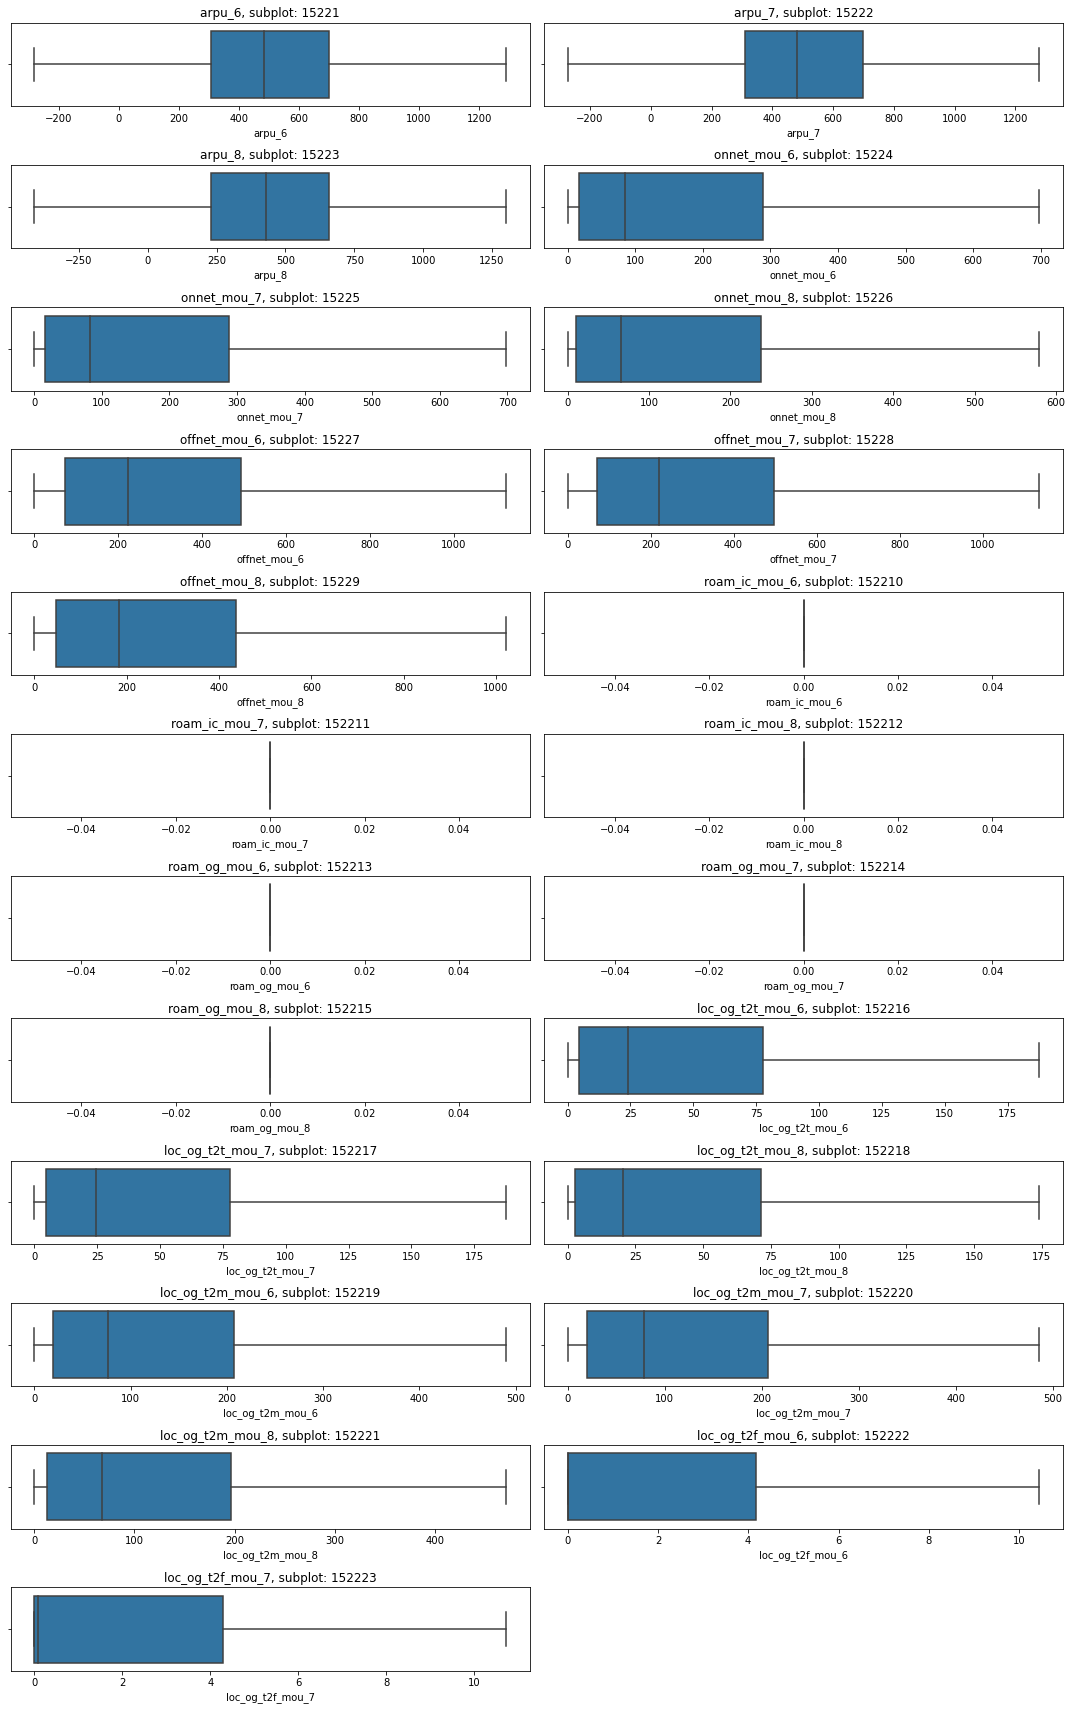

In [60]:
a = 152
b = 2
c = 1
fig = plt.figure(figsize=(15, 300))
fig.set_size_inches(15, 300)
for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(telecom_train[i])
    c = c + 1
    plt.tight_layout()
plt.show();

## Splitting Data into Train and Validation Sets

In [92]:
X = telecom_train.drop(['churn_probability'], axis=1)
y = telecom_train['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16810, 129) (16810,)
(4203, 129) (4203,)


## Standard Scaler


In [93]:
telecom_train.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,240.708,128.191,101.565,21.280,4.83,6.13,56.99,38.11,9.63,0.0,0.0,0.0,0.0,0.0,0.0,10.16,4.830,6.13,36.74,19.88,4.61,10.45,1.230,5.01,0.0,0.2,0.000,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.510,3.630,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.000,0.00,0.00,0.00,0.000,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,10.0,8.0,290,136.0,122,50,41,30,25.0,10,30,25.0,41.0,25.0,2.5,2.5,2.5,0.0,0.0,0.0,211.85,193.725,129.65,0.0,0.00,0.00,0.0,0.0,0.0,0,0,0,2.5,2.5,2.5,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.00,0.00,0
1,580.549,377.294,338.286,10.430,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.990,174.19,313.76,330.88,185.88,3.26,10.725,4.94,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.00,0.00,0.0,0.0,0.0,13.86,20.18,155.04,219.31,429.16,285.63,0.000,1.930,8.88,233.18,668.01,629.94,0.0,0.0,0.0,0.000,0.00,0.00,0.00,0.375,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,4.0,654,400.0,652,250,250,250,0.0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,211.85,0.000,129.65,0.0,0.00,0.00,0.0,-1.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1.0,-1.0,1.0,0.0,0.00,0.00,0
2,1130.948,905.506,479.762,697.915,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,187.66,187.665,0.89,79.79,424.63,378.01,10.45,10.725,8.88,0.0,0.0,0.000,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,158.66,117.63,30.39,123.78,278.49,148.83,30.025,30.225,23.66,391.38,448.21,202.89,0.0,0.0,0.0,58.975,0.00,0.00,0.00,0.000,0.0,101.43,0.00,0.00,598.54,448.36,203.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,19.0,10.0,1420,990.0,494,110,110,144,110.0,50,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,0.00,0.00,0
3,371.974,352.069,240.449,93.180,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.290,29.86,159.29,219.44,99.86,0.00,0.000,0.00,0.0,0.0,0.025,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.36,0.0,

In [94]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)

## PCA


In [108]:
#initialize the pca with randomized
pca = PCA()
# fit the training dataset
pca.fit(X_train)

PCA()

In [109]:
pca.components_

array([[ 1.39313939e-01,  1.50256986e-01,  1.48376007e-01, ...,
        -3.26461991e-02, -3.92063343e-02, -3.88741912e-02],
       [-2.76890324e-02, -2.79962440e-02,  6.54135126e-03, ...,
         1.58058578e-01,  1.55722988e-01,  1.50939266e-01],
       [-3.67795730e-02, -2.30477330e-02,  3.32326337e-04, ...,
        -6.30513009e-02, -7.46851861e-02, -7.40525939e-02],
       ...,
       [-0.00000000e+00, -2.81185772e-32, -6.20511396e-32, ...,
        -1.54074396e-32,  6.16297582e-33,  2.46519033e-32],
       [-0.00000000e+00,  1.15555797e-32, -1.02244090e-31, ...,
        -1.07852077e-32,  1.23259516e-32,  5.70075264e-32],
       [ 0.00000000e+00, -8.32667268e-17,  1.40001441e-16, ...,
        -1.32164245e-16,  8.91214186e-17,  3.46944695e-17]])

In [110]:
pca.explained_variance_ratio_

array([1.87820275e-01, 1.41088805e-01, 7.25394050e-02, 7.18870381e-02,
       4.59503828e-02, 3.96673182e-02, 3.02969957e-02, 2.60556052e-02,
       2.42878852e-02, 2.07324858e-02, 1.89937080e-02, 1.69882562e-02,
       1.60953655e-02, 1.58345124e-02, 1.53934625e-02, 1.35163256e-02,
       1.19952818e-02, 1.06802595e-02, 1.01753640e-02, 9.86902814e-03,
       9.37983922e-03, 9.17762691e-03, 8.96010929e-03, 8.62551815e-03,
       8.17612654e-03, 7.42566262e-03, 6.81284833e-03, 6.19953559e-03,
       6.06722303e-03, 5.81641146e-03, 5.56471157e-03, 5.46733946e-03,
       5.26397957e-03, 5.03444810e-03, 4.79667509e-03, 4.60238680e-03,
       4.32971946e-03, 4.09635056e-03, 4.05365300e-03, 3.77986382e-03,
       3.59692385e-03, 3.48420829e-03, 3.44647761e-03, 3.18179143e-03,
       2.98482421e-03, 2.94292802e-03, 2.92670591e-03, 2.75983123e-03,
       2.67152955e-03, 2.58190583e-03, 2.52529531e-03, 2.46607064e-03,
       2.35364243e-03, 2.23677907e-03, 2.21485353e-03, 2.18168455e-03,
      

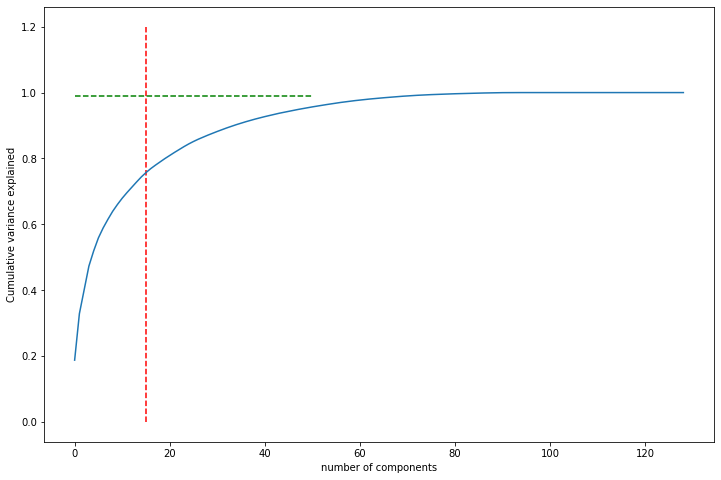

In [111]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1.2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [112]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=10)

In [113]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(16810, 10)

In [114]:
#correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())


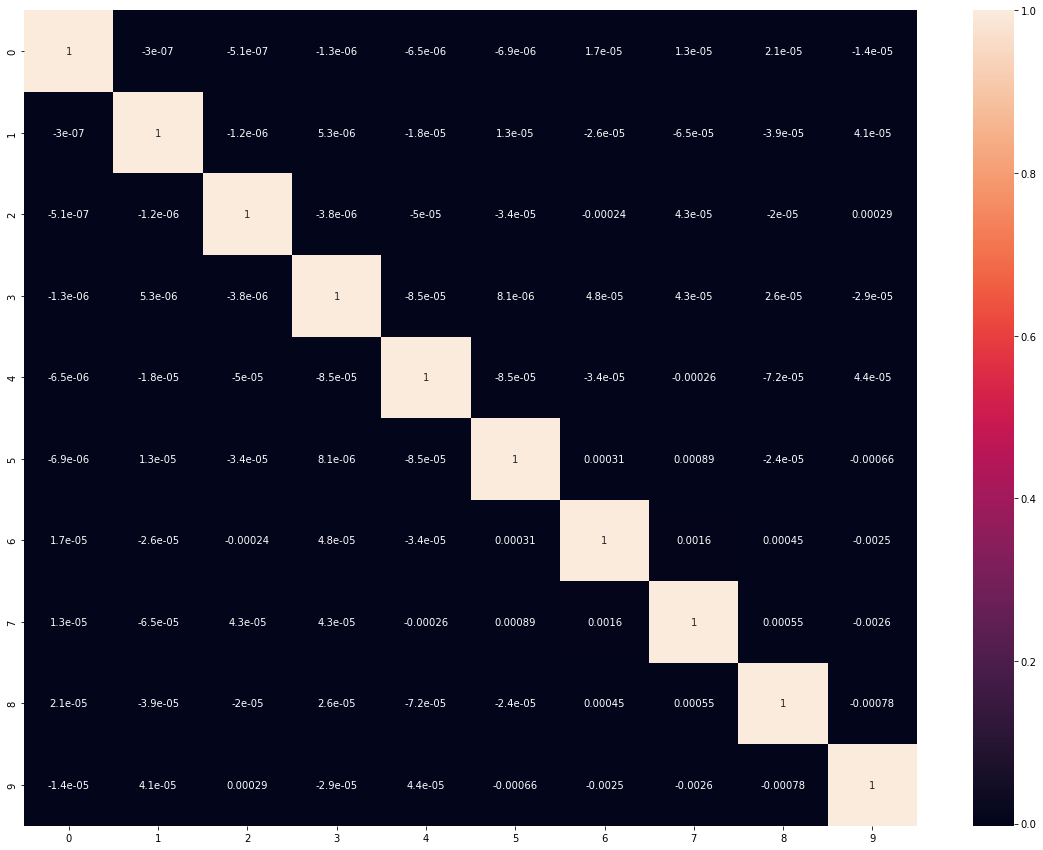

In [115]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[20,15])
sns.heatmap(corrmat, annot=True)
plt.show()

In [116]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4203, 10)

In [117]:
# fit and transform the whole dataset
X_pca = pca.fit_transform(X)

#### BASE LINE MODELLING


In [118]:
# List to store the model scores
model_score_list = []

In [119]:
# Will create a function and call it again and again for different models
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## Logistic Regression


In [120]:
# Initialize the Logistic regression
model1 = LogisticRegression(class_weight='balanced', random_state=42)
# fit the pca training data
model1.fit(df_train_pca, y_train)
# predict the testing pca data
Y_pred = model1.predict(df_test_pca)
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)
# add the model scores to score list 
model_score_list.append({'model_name':'LogisticRegression', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  90.89
ROC AUC score :  73.12
Precision score :  44.95
Recall score :  51.9


In [121]:
# Confusion matrix 
from sklearn import metrics
import statsmodels.api as sm
confusion = metrics.confusion_matrix(y_test, Y_pred )
confusion

array([[3642,  218],
       [ 165,  178]], dtype=int64)

## Random Forest


In [123]:
# initialize the randomforest
model2 = RandomForestClassifier(class_weight='balanced', random_state=100)
# fit the pca training data
model2.fit(df_train_pca, y_train)
# predict the pca testing data
Y_pred = model2.predict(df_test_pca)

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)
# add the model scores to score list
model_score_list.append({'model_name':'RandomForestClassifier', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  91.84
ROC AUC score :  50.0
Precision score :  0.0
Recall score :  0.0


#### Model Score List

In [124]:
# convert the model scores to dataframe
model_score_df = pd.DataFrame(model_score_list,columns=['model_name', 'acc_score', 'roc_score','precision_score','recall_score'])

# Order by highest recall score and roc_auc_score
model_score_df.sort_values(['acc_score','roc_score'], ascending=False)

,model_name,acc_score,roc_score,precision_score,recall_score
1,RandomForestClassifier,91.84,50.00,0.00,0.0
2,RandomForestClassifier,91.84,50.00,0.00,0.0
0,LogisticRegression,90.89,73.12,44.95,51.9


In [125]:
#Cross val score for Logistic regression
from sklearn.model_selection import GridSearchCV,cross_val_score
cross_val_score(model1, X_train, y_train, cv=5, n_jobs=-1)
cross_val_score(model1, X_train, y_train, cv=5, n_jobs=-1).mean()

0.8226650803093396

In [126]:
#Cross val score for Random Forest Classifier
cross_val_score(model2, X_train, y_train, cv=5, n_jobs=-1)
cross_val_score(model2, X_train, y_train, cv=5, n_jobs=-1).mean()

0.9405116002379537

Since it is more important to identify churners than the non-churners accurately, we go with the RandomForestClassifier which has high accuracy score and CV score

### Hyperparameter tuning for RANDOMFOREST CLASSIFIER

In [127]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
hyper_params = {'max_depth': [40,None],
                'max_features': ['auto'],
                'min_samples_leaf': [10, 20, 30],
                'n_estimators': [100,200,300]
               }

In [128]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [129]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, None], 'max_features': ['auto'],
                         'min_samples_leaf': [10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [130]:
# print the grid results
print('\n Best estimator:')
print(model_cv.best_estimator_)
print('\n Best score:')
print(model_cv.best_score_ * 2 - 1)
print('\n Best parameters:')
print(model_cv.best_params_)


 Best estimator:
RandomForestClassifier(max_depth=40, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

 Best score:
0.8853063652587747

 Best parameters:
{'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}


In [131]:
## Gradient Boosting

In [132]:
#Predictions for the GBM
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(learning_rate = .001, max_depth= 2,max_features= 1, min_samples_leaf= .3,min_samples_split= .2, n_estimators= 300, random_state = 42)
gbm.fit(X_train, y_train)
scores = cross_val_score(gbm, X_train, y_train, cv=5)
np.mean(scores)
print('the average validation accuracy across our 5 folds is ' + str(np.mean(scores)))

the average validation accuracy across our 5 folds is 0.9169541939321831


In [133]:
# initialize the model with the best estimor
model = model_cv.best_estimator_

# fit the pca training dataset
model.fit(df_train_pca, y_train)

# Predict the model with the pca testing dataset
Y_pred = model.predict(df_test_pca)

# get the predict probablities of pca testing dataset
Y_pred_proba = model.predict_proba(df_test_pca)

In [134]:
## 6. Model Evaluation

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [136]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, Y_pred))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))



Classification Report : 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96      3860
           1       0.00      0.00      0.00       343

    accuracy                           0.92      4203
   macro avg       0.46      0.50      0.48      4203
weighted avg       0.84      0.92      0.88      4203


TN = 3860, FP = 0, FN = 343, TP = 0




In [137]:
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred)

Accuracy Score :  91.84
ROC AUC score :  50.0
Precision score :  0.0
Recall score :  0.0


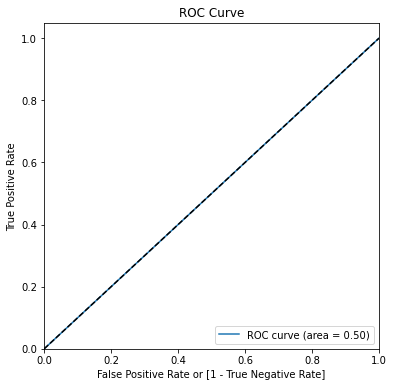

In [138]:
# ROC-AUC curve
draw_roc(y_test, Y_pred)

We have got the accuracy score of 91.8% with the best estimator which is slightly better than the Cross Validation mean score. Also the above Roc Curve seems to be in a good shape.

Nows let's see if we can optimize the cutoff further to minimize the False Negatives

In [139]:
#### Optimal probability cutoff to minimize False Negatives

In [140]:
# Frame the dataset with the predicted probabilities
Y_pred_final = pd.DataFrame({'actual':y_test,'pred_nonchurn_prob':Y_pred_proba[:,0],'pred_churn_prob':Y_pred_proba[:,1],'predicted':Y_pred})
Y_pred_final.head(5)

,actual,pred_nonchurn_prob,pred_churn_prob,predicted
11789,0,0.807130,0.192870,0
1747,1,0.646647,0.353353,0
19639,0,0.864539,0.135461,0
19066,0,0.794430,0.205570,0
8654,1,0.810930,0.189070,0


In [141]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > i else 0)
Y_pred_final.head()

,actual,pred_nonchurn_prob,pred_churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
11789,0,0.807130,0.192870,0,1,1,0,0,0,0,0,0,0,0
1747,1,0.646647,0.353353,0,1,1,1,1,0,0,0,0,0,0
19639,0,0.864539,0.135461,0,1,1,0,0,0,0,0,0,0,0
19066,0,0.794430,0.205570,0,1,1,1,0,0,0,0,0,0,0
8654,1,0.810930,0.189070,0,1,1,0,0,0,0,0,0,0,0


In [142]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( Y_pred_final['actual'], Y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081608  0.000000  1.000000
0.1   0.1  0.118011  0.040415  0.991254
0.2   0.2  0.701404  0.700000  0.717201
0.3   0.3  0.873900  0.920725  0.346939
0.4   0.4  0.918392  1.000000  0.000000
0.5   0.5  0.918392  1.000000  0.000000
0.6   0.6  0.918392  1.000000  0.000000
0.7   0.7  0.918392  1.000000  0.000000
0.8   0.8  0.918392  1.000000  0.000000
0.9   0.9  0.918392  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

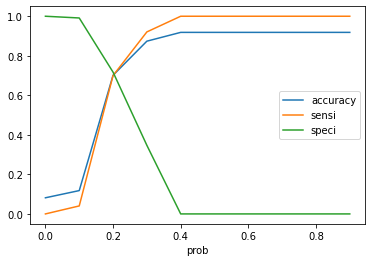

In [143]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [144]:
Y_pred_final['final_predicted'] = Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > 0.1 else 0)

In [145]:
### Final Model Evaluation


In [146]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, Y_pred_final['final_predicted']))

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred_final['final_predicted']).ravel()
print('\nTN = {0}, FP = {1}, FN = {2}, TP = {3}\n\n'.format(tn, fp, fn, tp))

# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred_final['final_predicted'])


Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.04      0.08      3860
           1       0.08      0.99      0.16       343

    accuracy                           0.12      4203
   macro avg       0.53      0.52      0.12      4203
weighted avg       0.91      0.12      0.08      4203


TN = 156, FP = 3704, FN = 3, TP = 340


Accuracy Score :  11.8
ROC AUC score :  51.58
Precision score :  8.41
Recall score :  99.13


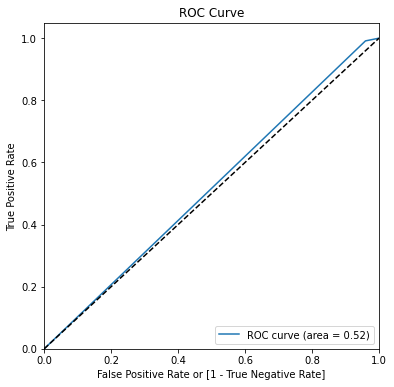

In [147]:
# ROC-AUC curve
draw_roc(y_test, Y_pred_final['final_predicted'])

In [148]:
rf_best = model_cv.best_estimator_
rf_best = rf_best.fit(X, y)

In [149]:
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp in %": 100*rf_best.feature_importances_
})

imp_df.sort_values(by="Imp in %", ascending=False, inplace=True)

In [150]:
imp_df.head(30)

,Varname,Imp in %
50,loc_ic_t2m_mou_8,10.077703
71,total_ic_mou_8,7.670407
56,loc_ic_mou_8,7.664493
2,arpu_8,6.515564
86,total_rech_amt_8,5.784665
47,loc_ic_t2t_mou_8,4.119225
92,last_day_rch_amt_8,3.322909
20,loc_og_t2m_mou_8,3.161374
89,max_rech_amt_8,3.155025
8,offnet_mou_8,2.288573


#### Modeling using Pipeline


#### Modeling using Pipeline


In [151]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [152]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca),
                         ('model',lr)])

In [153]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [154]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9270077334919691


In [155]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.9122055674518201


In [156]:
confusion_matrix(y_train, pipe.predict(X_train))

array([[15236,   178],
       [ 1049,   347]], dtype=int64)

In [157]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[3662,  198],
       [ 171,  172]], dtype=int64)

# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [158]:
#Unseen Data
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [159]:
#Get a list of all 84 columns which is having NaN values and requires imputation with 0.
col_NaN = unseen.loc[:, unseen.isnull().any()].columns
col_NaN.shape


(125,)

In [160]:
# replacing null values by 0 for all above 108 columns
# Imputing the
 # NaN values using KNN Imputer

for col in col_NaN:
    unseen[col] = unseen[col].fillna(0)

In [161]:
unseen.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [162]:

new_vars = list(X.columns)
new_vars

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 

In [163]:
submission_data = unseen.set_index('id')[new_vars]
submission_data.shape

(30000, 129)

In [164]:
unseen['churn_probability'] = pipe.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [165]:
output.to_csv('submission_test_predv2.csv',index=False)